<a href="https://colab.research.google.com/github/akshayabhale1406/SCLR_Jamboree_Education_Linear_Regression/blob/main/Jamboree_Education_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JAMBOREE EDUCATION - LINEAR REGRESSION**

**ABOUT JAMBOREE**

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

### Importing required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

### Importing CSV for Data Analysis

In [3]:
df = pd.read_csv("/content/sample_data/Jamboree_Admission.csv")

### Checking if the CSV is loaded is loaded

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Getting info of the data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


#### **OBSERVATION**

There are total 500 rows in the data along with 9 columns. The data types of each column is correct. There are no missing values.

### Statistical summary of the dataset

In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Droping the unique row identifier as we don’t want our model to build some understanding based on row numbers.

In [7]:
df_non_serial = df.drop(["Serial No."], axis = 1)
df_box_plot = df.iloc[:, 1:7]

### Creating column separation based on the numerical and catagorical variable.

In [8]:
score_columns = ["GRE Score", "TOEFL Score", "CGPA"]
rating_columns = ["University Rating", "SOP", "LOR", "Research"]

### Univariate Analysis

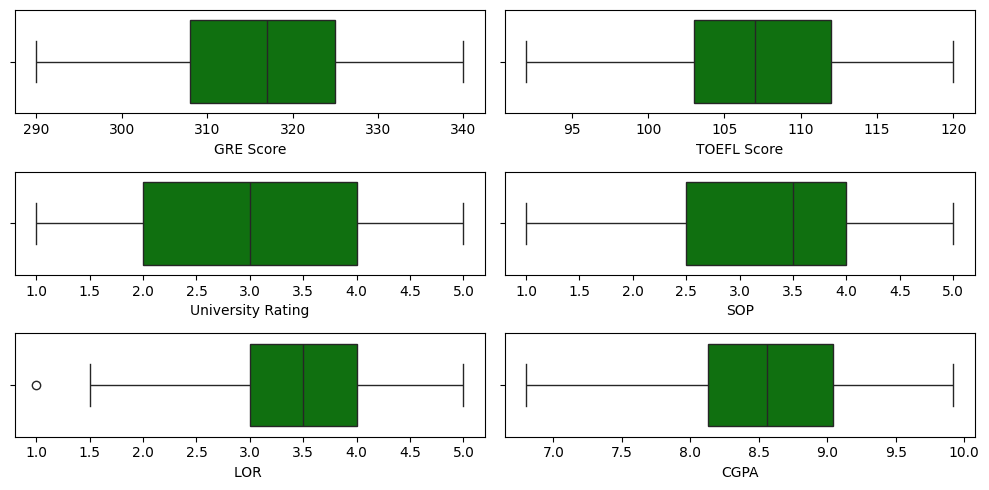

In [9]:
def box_plot_of_columns (dfa):
     fig, axs = plt.subplots(3, 2, figsize = (10, 5))
     ax_index = 0
     for column in dfa:
       row = ax_index // 2
       col = ax_index % 2
       sns.boxplot(dfa[column], orient = "h", color = "green", ax=axs[row, col])
       ax_index += 1
       plt.tight_layout()
     plt.show()
box_plot_of_columns(df_box_plot)

**OBSERVATION:**

Box Plot showa that there are no outliers present in the data except in LOR.


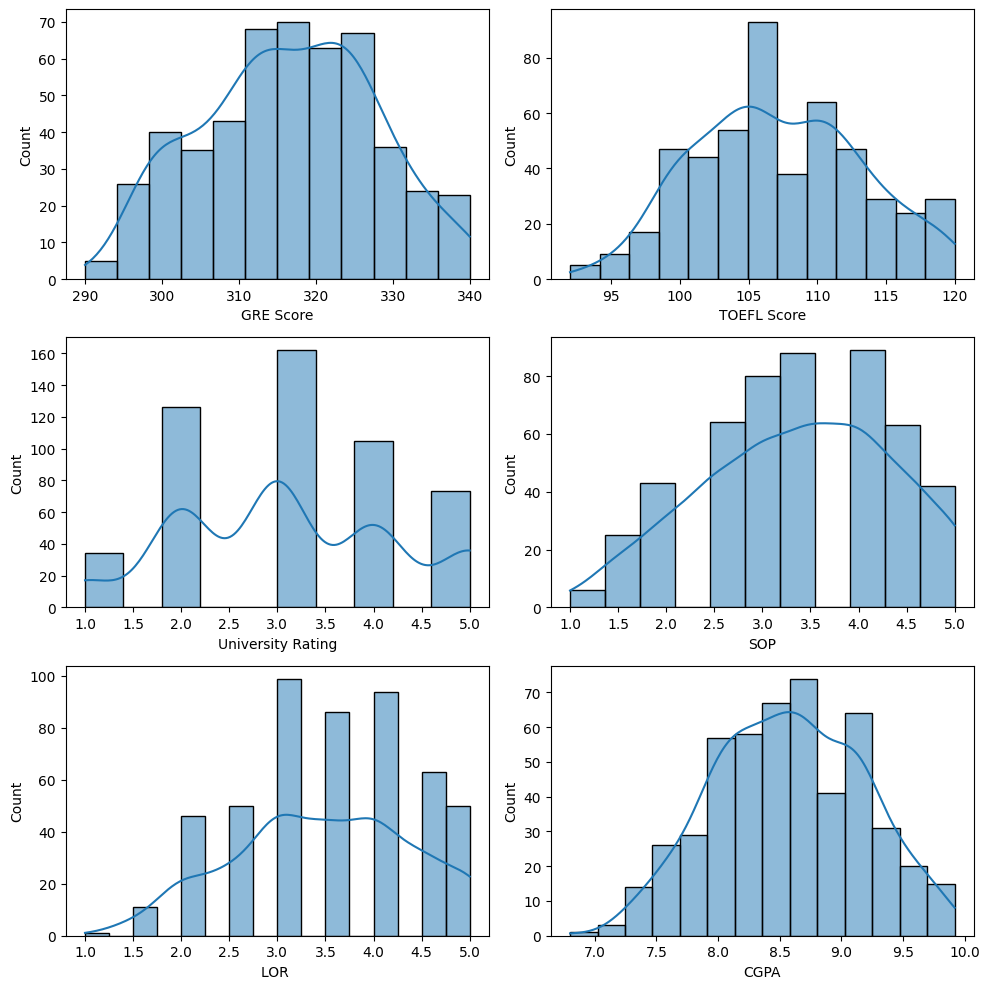

In [10]:
def hist_plot_of_columns (dfa):
     fig, axs = plt.subplots(3, 2, figsize = (10, 10))
     ax_index = 0
     for column in dfa:
       row = ax_index // 2
       col = ax_index % 2
       sns.histplot(dfa[column], ax=axs[row, col], kde = True)
       ax_index += 1
       plt.tight_layout()
     plt.show()
hist_plot_of_columns(df_box_plot)

### Bivariate Analysis

In [11]:
df_scatter_plot = df_non_serial[["GRE Score", "TOEFL Score", "CGPA", "University Rating", "SOP", "LOR ", "Chance of Admit "]]

### Scatter plot to show BI-VARIATE analysis

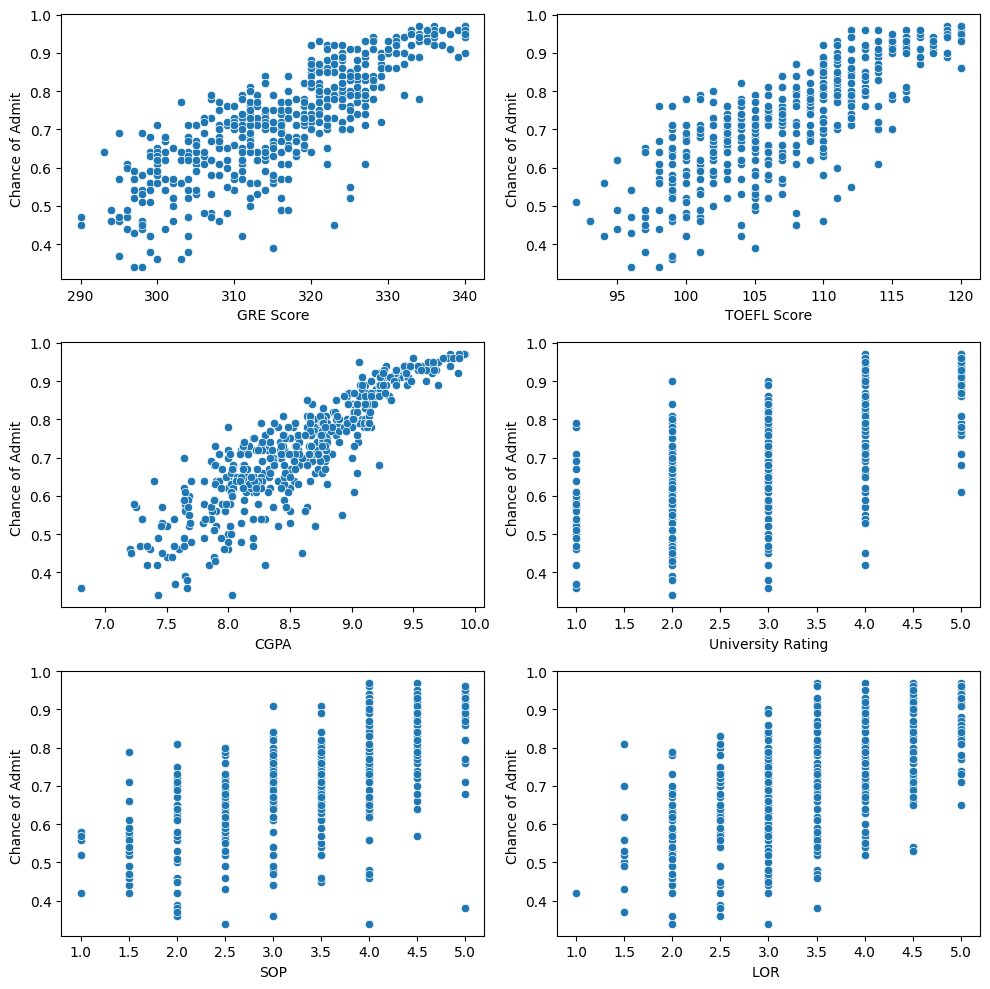

In [12]:
df_scatter_plot = df_non_serial[["GRE Score", "TOEFL Score", "CGPA", "University Rating", "SOP", "LOR ", "Chance of Admit "]]
df_scatter_plot_x_axis = df_scatter_plot.drop(columns = ["Chance of Admit "])
df_scatter_plot_y_axis = df_scatter_plot["Chance of Admit "]

def scatter_plot_of_columns (dfa, y_axis):
     fig, axs = plt.subplots(3, 2, figsize = (10, 10))
     ax_index = 0
     for column in dfa:
       row = ax_index // 2
       col = ax_index % 2
       sns.scatterplot(x = dfa[column], y = y_axis, data = dfa, ax=axs[row, col])
       ax_index += 1
       plt.tight_layout()
     plt.show()
scatter_plot_of_columns(df_scatter_plot_x_axis, df_scatter_plot_y_axis)

In [13]:
df_pair_plot_column = df[score_columns]
df_pair_plot_column["Chance of Admit "] = df["Chance of Admit "]

<ipython-input-13-e847c582376b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pair_plot_column["Chance of Admit "] = df["Chance of Admit "]


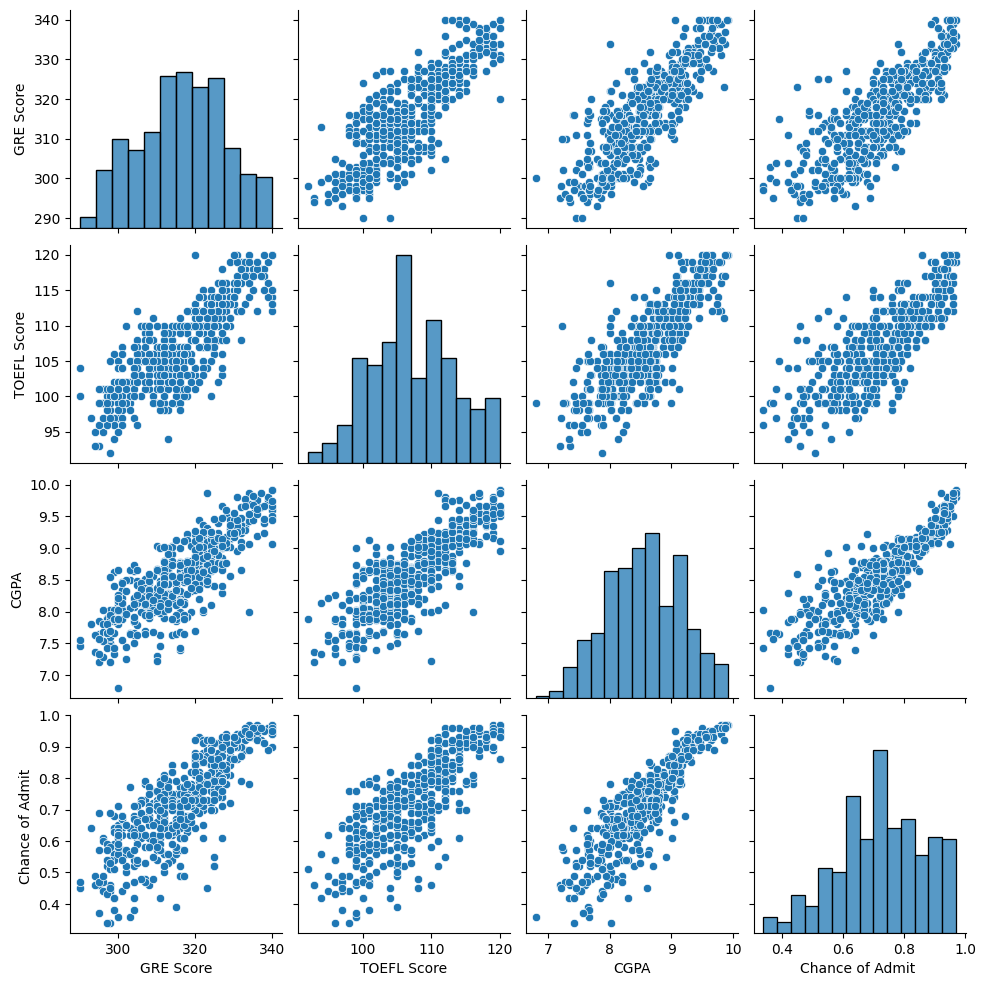

In [14]:
def pair_plot_of_columns (dfa):
     sns.pairplot(dfa)
pair_plot_of_columns(df_pair_plot_column)

### Multivariate Analysis of the data

<Axes: >

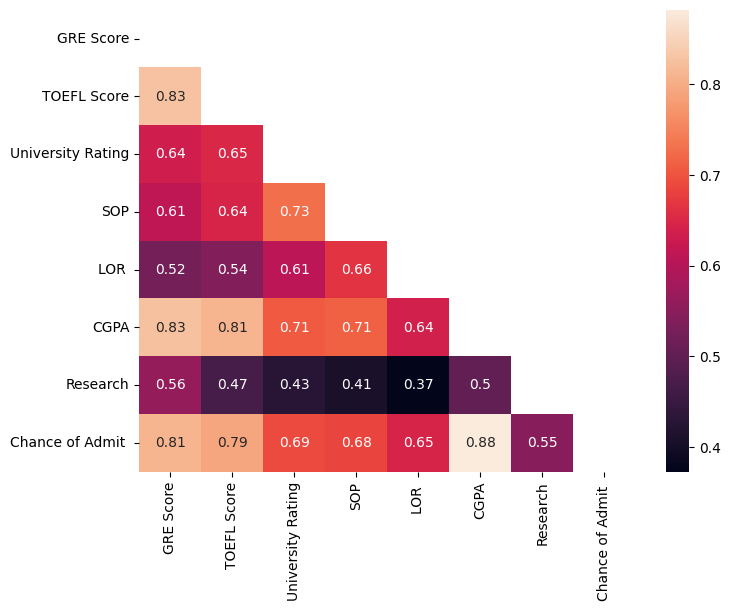

In [15]:
corr = df_non_serial.corr()
matrix = np.triu(corr)
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, mask=matrix)

### Checking if any rows are duplicate.

In [16]:
df_duplicate_check = df.duplicated(keep = False)
df_duplicate_check.value_counts()

,count
False,500


**OBSERVATION:**

There are no duplicates rows in the data.

### Creating a new column as feature showing possibility of admission as a categorical feature.

In [17]:
df_new_feature = df.copy()

In [18]:
def admit_possibility_indicator(dfb):
  if dfb["Chance of Admit "] >= 0.9:
    return "High"
  elif 0.9 > dfb["Chance of Admit "] > 0.7:
    return "Medium"
  else:
    return "Low"

df_new_feature['Admission_Possibility'] = df_new_feature.apply(admit_possibility_indicator, axis=1)

df_new_feature.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission_Possibility
0,1,337,118,4,4.5,4.5,9.65,1,0.92,High
1,2,324,107,4,4.0,4.5,8.87,1,0.76,Medium
2,3,316,104,3,3.0,3.5,8.00,1,0.72,Medium
3,4,322,110,3,3.5,2.5,8.67,1,0.80,Medium
4,5,314,103,2,2.0,3.0,8.21,0,0.65,Low


### Data preprocessing for building a ML model

In [19]:
scaler = MinMaxScaler()

#### Fitting and Transforming the data to streamline the data preprocessing workflow, making it more concise and efficient.

In [20]:
df_scaled = scaler.fit_transform(df_non_serial)
df_scaled = pd.DataFrame(df_scaled, columns = df_non_serial.columns)
df_scaled.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063


### Splitting the columns into Independant Variable and Dependant/Target Variable

In [21]:
df_x = df_scaled.drop(columns = ["Chance of Admit "])

In [22]:
df_y = df["Chance of Admit "]

### Creating the Training and Testing data

In [23]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 10)

### Linear Regression from (Statsmodel library)

In [24]:
X_sm = sm.add_constant(x_train)

model = sm.OLS(y_train, X_sm)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     265.1
Date:                Fri, 03 Jan 2025   Prob (F-statistic):          2.29e-144
Time:                        19:00:20   Log-Likelihood:                 559.41
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3492      0.01

**OBSERVATION:**



1.   Model Fit: The R-squared and the adjusted R2 value is 0.82 which indicates 82% of the variance in the dependant variable. In simpler terms, 82% of the times, the predicted value is closer to the actual value. Also, very small difference in the R-square and Adj R-square means that the included predictors are likely relevant and contribute meaningfully to explaining the variation in the dependent variable.
2.   Model Significance: The model is statistically significant (Prob (F-statistic) < 0.05). In simple terms, the results we are seeing are not by just chance, but we confident that the effect exists in real world.
3.   Model Coefficients and p-Value: GRE Score, LOR, CGPA, and Research are statistically significant predictors (P>|t| < 0.05). In simpler terms, GRE Score, LOR, CGPA, and Research are the variables which affect Chance of Admission. And CGPA is most important variable affecting Chance of Admission followed by GRE Score. It is also shown by Coefficients column in summary.
4.   F-statistic: 265.1. This tests the overall significance of the model. A high F-statistic with a low p-value indicates the model is statistically significant.
5.   Prob (F-statistic): 2.29e-144. This is the p-value for the F-statistic. It's extremely low (essentially zero), indicating strong evidence that at least one predictor is significantly related to the chance of admission.
6.   Skew and Kurtosis: These describe the shape of the residual distribution. A skew of -1.122 indicates a left-skewed distribution, and a kurtosis of 5.572 indicates heavy tails.



### Generating prediction based on input variable


In [25]:
y_pred = results.predict(X_sm)

### Model coefficients with column names

In [26]:
coefficients = results.params
coefficients = pd.DataFrame(coefficients, columns = ["Model Coefficients"])
coefficients

,Model Coefficients
const,0.349242
GRE Score,0.119166
TOEFL Score,0.050961
University Rating,0.020489
SOP,0.024040
LOR,0.060161
CGPA,0.363873
Research,0.021928


**OBSERVATION:**

GRE Score, LOR, CGPA, and Research are statistically significant predictors (P>|t| < 0.05). In simpler terms, GRE Score, LOR, CGPA, and Research are the variables which affect Chance of Admission. And CGPA is most important variable affecting Chance of Admission followed by GRE Score. It is also shown by Coefficients column in summary.

### Trying out Ridge and Lasso regression


**Linear Regression**: Tries to find a line (or hyperplane in higher dimensions) that best fits the data by minimizing the sum of squared differences between predicted and actual values.
Overfitting: When a model learns the training data too well, including its noise and outliers. This leads to poor performance on new, unseen data.

**Ridge Regression's Tweak**: It adds a "penalty" to the size of the coefficients (the values that multiply the predictor variables). This penalty discourages the model from giving too much importance to any single predictor.

Think of it like this: Imagine we're trying to balance a scale with several weights (the predictors).

Linear Regression: Tries to balance the scale perfectly, even if it means using very large weights on some sides. This can make the scale very sensitive to small changes.

Ridge Regression: Tries to balance the scale while also keeping the weights relatively small. This makes the scale more stable and less sensitive to noise.

In essence, Ridge Regression:
1. Reduces the complexity of the model.
2. Helps prevent overfitting.
3. Improves the model's ability to generalize to new data.
4. Key Point: Ridge Regression doesn't eliminate predictors entirely; it just shrinks their coefficients towards zero.

In [27]:
ridge = Ridge(alpha = 0.001)
ridge.fit(x_train, y_train)

Ridge(alpha=0.001)

In [28]:
y_pred_ridge = ridge.predict(x_test)
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)
print("Mean Squared Error:", mse)
print("R-squared:", round(r2, 2))

Mean Squared Error: 0.0035068709401039387
R-squared: 0.8


**Lasso Regression** is a special type of linear regression that helps make models simpler and easier to understand, especially when you have lots of potential factors that could influence the outcome you're trying to predict.

Here's an analogy:

Imagine you're a detective trying to figure out who committed a crime. You have a long list of suspects (these are like the "features" or predictor variables in your data).

Regular Linear Regression: This would be like considering every single suspect as potentially important, even if there's very little evidence against some of them.
Lasso Regression: This is like a detective who focuses only on the most important clues. It helps you rule out suspects with weak or no evidence, so you can concentrate on the most likely culprits.

Lasso Regression is like regular linear regression, but it has a built-in way to:

1. Select the most important factors:
It automatically figures out which factors are really contributing to the outcome and which ones are just noise.

2. Simplify the model: By ignoring unimportant factors, it creates a simpler model that's easier to understand and use.

3. Prevent overfitting: This means the model is less likely to be fooled by random quirks in the data and will do a better job of making predictions on new data.

In [29]:
lasso = Lasso(alpha = 0.001)
lasso.fit(x_train, y_train)

Lasso(alpha=0.001)

In [30]:
y_pred_lasso = lasso.predict(x_test)
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)
print("Mean Squared Error:", mse)
print("R-squared:", round(r2, 2))

Mean Squared Error: 0.0035495240681758865
R-squared: 0.79


### **Test the assumptions of linear regression**:

1.   Multicollinearity check by VIF score
2.   Mean of residuals
3.   Linearity of variables (no pattern in residual plot)
4.   Test for Homoscedasticity
5.   Normality of residuals



In [31]:
vif = pd.DataFrame()
vif["Features"] = x_train.columns
vif["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,40.46
1,TOEFL Score,28.54
0,GRE Score,27.63
3,SOP,18.45
4,LOR,14.25
2,University Rating,10.62
6,Research,3.43


In [32]:
cols2 = vif["Features"][1:].values
X2 = pd.DataFrame(x_train, columns= x_train.columns)[cols2]
X2_sm = sm.add_constant(X2)
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     223.6
Date:                Fri, 03 Jan 2025   Prob (F-statistic):          2.35e-123
Time:                        19:00:20   Log-Likelihood:                 507.07
No. Observations:                 400   AIC:                            -1000.
Df Residuals:                     393   BIC:                            -972.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3814      0.01

In [33]:
vif_threshold = 5
r2_threshold = 0.75
i = 1
feat_removed = ["CGPA"]
while True:
  vif = pd.DataFrame()
  X_t = pd.DataFrame(x_train, columns = x_train.columns)[cols2]
  vif["Features"] = cols2
  vif["VIF"] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
  vif["VIF"] = round(vif["VIF"], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)

  cols2 = vif["Features"][1:].values
  X2 = pd.DataFrame(x_train, columns= x_train.columns)[cols2]
  X2_sm = sm.add_constant(X2)
  sm_model = sm.OLS(list(y_train), X2_sm).fit()

  if (vif.iloc[0]["VIF"] < vif_threshold) or (sm_model.rsquared_adj < r2_threshold):
    print("Reached threshold")
    print("Highest vif: ", vif.iloc[0])
    print("Current adj. R2 is: ", sm_model.rsquared_adj)
    print("Features removed: ", i)
    print("List of features removed: ", feat_removed)
    break

  else:
    feat_removed.append(vif.iloc[0]["Features"])
  i += 1


Reached threshold
Highest vif:  Features    GRE Score
VIF             11.68
Name: 0, dtype: object
Current adj. R2 is:  0.617986678988567
Features removed:  3
List of features removed:  ['CGPA', 'TOEFL Score', 'SOP']


In [34]:
vif

,Features,VIF
0,GRE Score,11.68
1,LOR,9.28
2,University Rating,8.50
3,Research,3.42


Mean of residuals: -6.765421556309548e-16


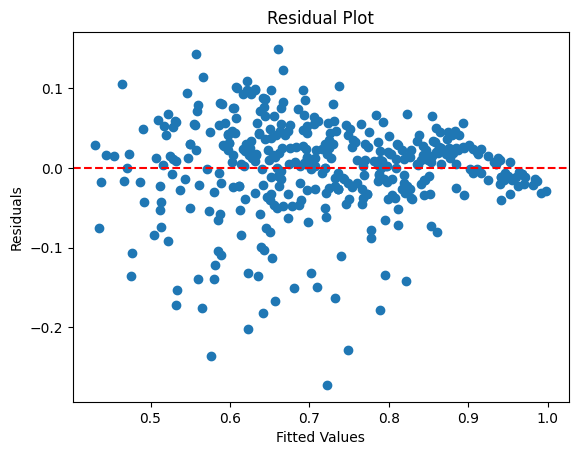

TtestResult(statistic=-2.2614681427412963e-13, pvalue=0.9999999999998197, df=399)


In [35]:
residuals = results.resid

mean_residual = np.mean(residuals)

print(f"Mean of residuals: {mean_residual}")

plt.scatter(results.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# More robust check: statistical test
import scipy.stats as stats
print(stats.ttest_1samp(residuals, 0))

In [36]:
X_sm = sm.add_constant(x_train)
sm_model = sm.OLS(y_train, X_sm).fit()
y_hat = sm_model.predict(X_sm)
errors = y_hat - y_train

Text(0.5, 1.0, 'Predicted values vs Residuals')

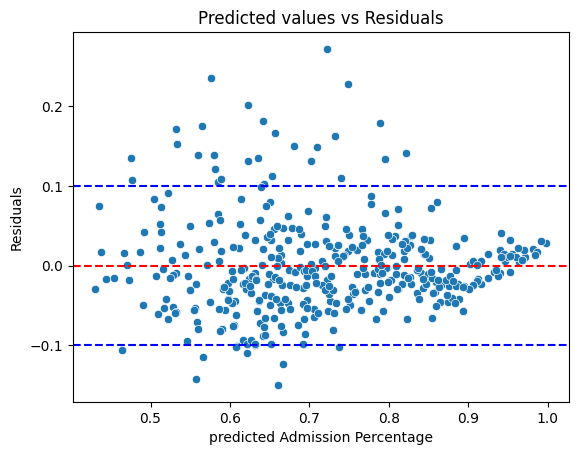

In [37]:
sns.scatterplot(x = y_hat, y = errors)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y = 0.1, color = 'b', linestyle = '--')
plt.axhline(y = -0.1, color = 'b', linestyle = '--')
plt.xlabel("predicted Admission Percentage")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

Text(0.5, 1.0, 'Distribution of Residuals')

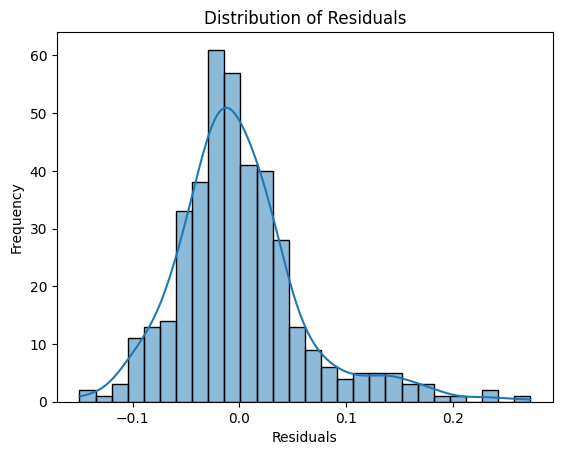

In [38]:
sns.histplot(errors, kde = True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")

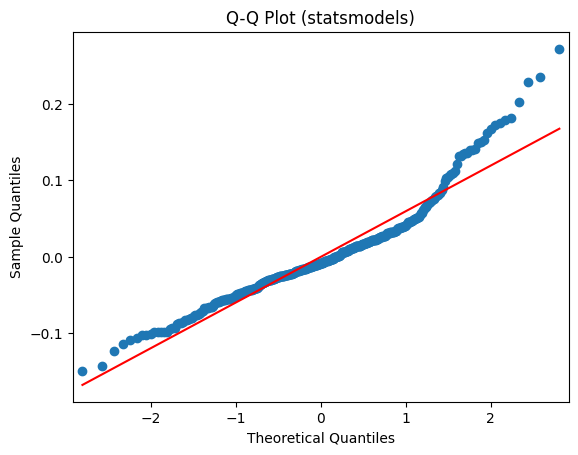

In [39]:
sm.qqplot(errors, line='s')
plt.title("Q-Q Plot (statsmodels)")
plt.show()

In [40]:
adj_r2 = sm_model.rsquared_adj

mae = mean_absolute_error(y_train, y_hat)
rmse = np.sqrt(mean_squared_error(y_train, y_hat))
r2 = r2_score(y_train, y_hat)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")

MAE: 0.04301097914772511
RMSE: 0.059757282090834585
R-squared: 0.8255906992873271
Adjusted R-squared: 0.8224762474888865


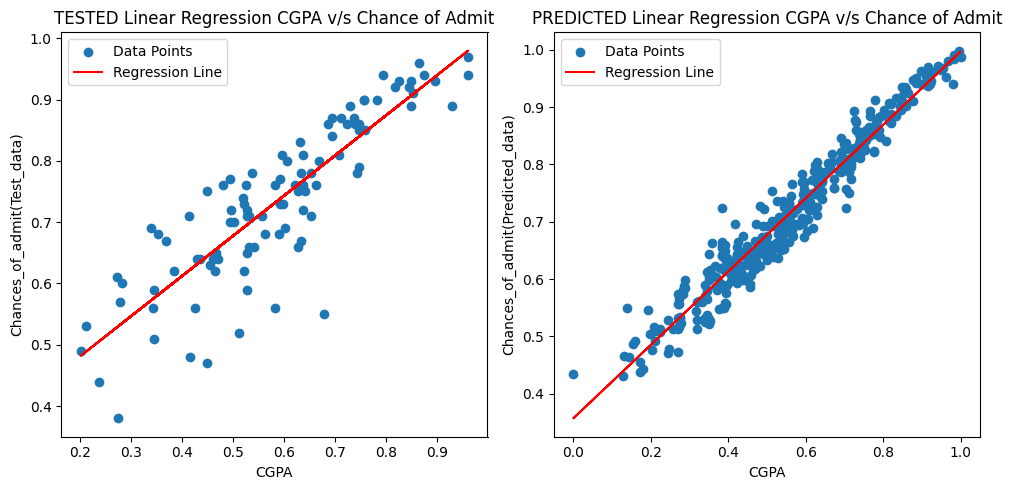

In [41]:
X_1 = x_test["CGPA"]
coefficients = np.polyfit(X_1, y_test, 1)  # Fit a 1-degree polynomial (line)
m = coefficients[0]  # Slope
b = coefficients[1]  # Intercept
regression_line_1 = m * X_1 + b

X_2 = x_train["CGPA"]
coefficients = np.polyfit(X_2, y_pred, 1)  # Fit a 1-degree polynomial (line)
m = coefficients[0]  # Slope
b = coefficients[1]  # Intercept
regression_line_2 = m * X_2 + b

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figsize as needed

# Plot 1
# Create the scatter plot
axes[0].scatter(X_1, y_test, label='Data Points')

# Plot the regression line
axes[0].plot(X_1, regression_line_1, color='red', label='Regression Line')
axes[0].set_xlabel('CGPA')
axes[0].set_ylabel('Chances_of_admit(Test_data)')
axes[0].set_title('TESTED Linear Regression CGPA v/s Chance of Admit')
axes[0].legend()

# Plot 2
# Create the scatter plot
axes[1].scatter(X_2, y_pred, label='Data Points')

# Plot the regression line
axes[1].plot(X_2, regression_line_2, color='red', label='Regression Line')
axes[1].set_xlabel('CGPA')
axes[1].set_ylabel('Chances_of_admit(Predicted_data)')
axes[1].set_title('PREDICTED Linear Regression CGPA v/s Chance of Admit')
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

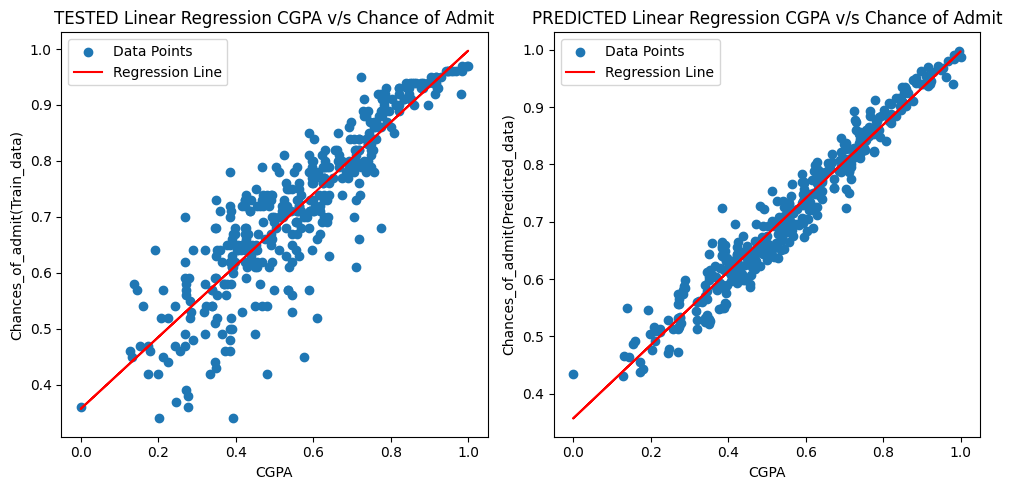

In [43]:
X_1 = x_train["CGPA"]
coefficients = np.polyfit(X_1, y_train, 1)  # Fit a 1-degree polynomial (line)
m = coefficients[0]  # Slope
b = coefficients[1]  # Intercept
regression_line_1 = m * X_1 + b

X_2 = x_train["CGPA"]
coefficients = np.polyfit(X_2, y_pred, 1)  # Fit a 1-degree polynomial (line)
m = coefficients[0]  # Slope
b = coefficients[1]  # Intercept
regression_line_2 = m * X_2 + b

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figsize as needed

# Plot 1
# Create the scatter plot
axes[0].scatter(X_1, y_train, label='Data Points')

# Plot the regression line
axes[0].plot(X_1, regression_line_1, color='red', label='Regression Line')
axes[0].set_xlabel('CGPA')
axes[0].set_ylabel('Chances_of_admit(Train_data)')
axes[0].set_title('TESTED Linear Regression CGPA v/s Chance of Admit')
axes[0].legend()

# Plot 2
# Create the scatter plot
axes[1].scatter(X_2, y_pred, label='Data Points')

# Plot the regression line
axes[1].plot(X_2, regression_line_2, color='red', label='Regression Line')
axes[1].set_xlabel('CGPA')
axes[1].set_ylabel('Chances_of_admit(Predicted_data)')
axes[1].set_title('PREDICTED Linear Regression CGPA v/s Chance of Admit')
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

plt.show()